# 고객마다 같은 제휴사를 얼마마다 이용하는지 계산

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

p1grade = pd.read_csv("cust_grade.csv",index_col=0)
p3 = pd.read_csv("LPOINT_BIG_COMP_03_COP_U.csv",index_col=0)

p3 = p3.drop(labels=['vst_dt'], axis=1)

In [2]:
custs = pd.DataFrame(p3.groupby('cust').size(), columns=['count'])
custs = custs.loc[custs['count'] > 1]

In [3]:
p3c = pd.merge(p3,custs,left_on='cust',right_on='cust')
p3c = p3c.sort_values(by=['cust','de_dt'],ascending=[False,True])
p3c = p3c.drop('count',axis=1)

In [4]:
p3c_grade = pd.merge(p3c, p1grade, left_on='cust', right_on='cust')

In [5]:
p3c_grade['de_dt_type'] = p3c_grade['de_dt'].astype(str)

p3c_grade['de_dt_type'] = pd.to_datetime(p3c_grade['de_dt_type'])

In [6]:
b = p3c_grade.loc[p3c_grade['cop_c']=='B01']
b = b.sort_values(by=['cust','de_dt'],ascending=[False,True])

c1 = p3c_grade.loc[p3c_grade['cop_c']=='C01']
c1 = c1.sort_values(by=['cust','de_dt'],ascending=[False,True])

c2 = p3c_grade.loc[p3c_grade['cop_c']=='C02']
c2 = c2.sort_values(by=['cust','de_dt'],ascending=[False,True])

d1 = p3c_grade.loc[p3c_grade['cop_c']=='D01']
d1 = d1.sort_values(by=['cust','de_dt'],ascending=[False,True])

d2 = p3c_grade.loc[p3c_grade['cop_c']=='D02']
d2 = d2.sort_values(by=['cust','de_dt'],ascending=[False,True])

e = p3c_grade.loc[p3c_grade['cop_c']=='E01']
e = e.sort_values(by=['cust','de_dt'],ascending=[False,True])

In [7]:
shifted_b = pd.DataFrame(b.de_dt_type.shift(-1))
shifted_c1 = pd.DataFrame(c1.de_dt_type.shift(-1))
shifted_c2 = pd.DataFrame(c2.de_dt_type.shift(-1))
shifted_d1 = pd.DataFrame(d1.de_dt_type.shift(-1))
shifted_d2 = pd.DataFrame(d2.de_dt_type.shift(-1))
shifted_e = pd.DataFrame(e.de_dt_type.shift(-1))

b['intervals'] = (shifted_b['de_dt_type'] - b['de_dt_type']).dt.days
c1['intervals'] = (shifted_c1['de_dt_type'] - c1['de_dt_type']).dt.days
c2['intervals'] = (shifted_c2['de_dt_type'] - c2['de_dt_type']).dt.days
d1['intervals'] = (shifted_d1['de_dt_type'] - d1['de_dt_type']).dt.days
d2['intervals'] = (shifted_d2['de_dt_type'] - d2['de_dt_type']).dt.days
e['intervals'] = (shifted_e['de_dt_type'] - e['de_dt_type']).dt.days

In [8]:
import numpy as np

shifted_b_cust = pd.DataFrame(b.cust.shift(-1))
shifted_c1_cust = pd.DataFrame(c1.cust.shift(-1))
shifted_c2_cust = pd.DataFrame(c2.cust.shift(-1))
shifted_d1_cust = pd.DataFrame(d1.cust.shift(-1))
shifted_d2_cust = pd.DataFrame(d2.cust.shift(-1))
shifted_e_cust = pd.DataFrame(e.cust.shift(-1))

b['same_person'] = np.nan
c1['same_person'] = np.nan
c2['same_person'] = np.nan
d1['same_person'] = np.nan
d2['same_person'] = np.nan
e['same_person'] = np.nan

b.loc[b['cust']==shifted_b_cust['cust'], 'same_person'] = 0
b.loc[b['cust']!=shifted_b_cust['cust'], 'same_person'] = 1

c1.loc[c1['cust']==shifted_c1_cust['cust'], 'same_person'] = 0
c1.loc[c1['cust']!=shifted_c1_cust['cust'], 'same_person'] = 1

c2.loc[c2['cust']==shifted_c2_cust['cust'], 'same_person'] = 0
c2.loc[c2['cust']!=shifted_c2_cust['cust'], 'same_person'] = 1

d1.loc[d1['cust']==shifted_d1_cust['cust'], 'same_person'] = 0
d1.loc[d1['cust']!=shifted_d1_cust['cust'], 'same_person'] = 1

d2.loc[d2['cust']==shifted_d2_cust['cust'], 'same_person'] = 0
d2.loc[d2['cust']!=shifted_d2_cust['cust'], 'same_person'] = 1

e.loc[e['cust']==shifted_e_cust['cust'], 'same_person'] = 0
e.loc[e['cust']!=shifted_e_cust['cust'], 'same_person'] = 1


b = b.loc[b['same_person']==0]
b = b.drop('same_person',axis=1)
b = b.drop(b.tail(1).index,axis=0)

c1 = c1.loc[c1['same_person']==0]
c1 = c1.drop('same_person',axis=1)
c1 = c1.drop(c1.tail(1).index,axis=0)

c2 = c2.loc[c2['same_person']==0]
c2 = c2.drop('same_person',axis=1)
c2 = c2.drop(c2.tail(1).index,axis=0)

d1 = d1.loc[d1['same_person']==0]
d1 = d1.drop('same_person',axis=1)
d1 = d1.drop(d1.tail(1).index,axis=0)

d2 = d2.loc[d2['same_person']==0]
d2 = d2.drop('same_person',axis=1)
d2 = d2.drop(d2.tail(1).index,axis=0)

e = e.loc[e['same_person']==0]
e = e.drop('same_person',axis=1)
e = e.drop(e.tail(1).index,axis=0)

In [9]:
b = b.loc[b['intervals']>0].reset_index(drop=True)

c1 = c1.loc[c1['intervals']>0].reset_index(drop=True)

c2 = c2.loc[c2['intervals']>0].reset_index(drop=True)

d1 = d1.loc[d1['intervals']>0].reset_index(drop=True)

d2 = d2.loc[d2['intervals']>0].reset_index(drop=True)

e = e.loc[e['intervals']>0].reset_index(drop=True)

# Pairplot

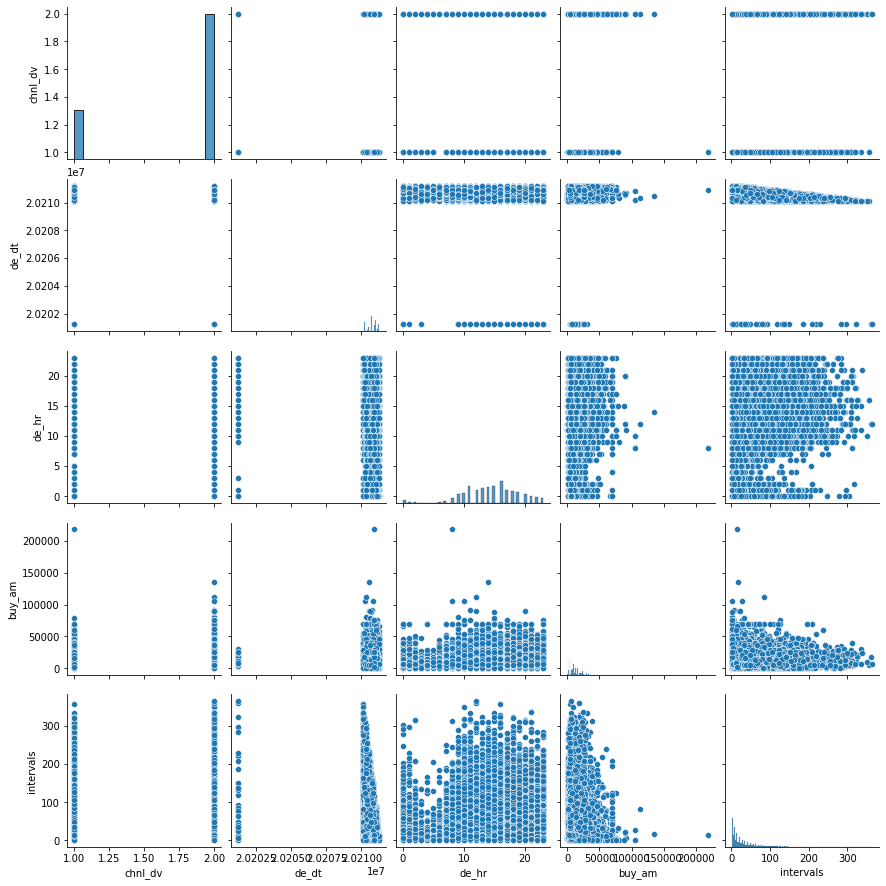

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(c1)
plt.show()

### ==> 'buy_am' column과 'intervals' column 간에 연관성이 보임
### 

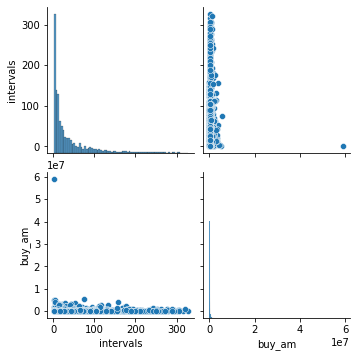

In [11]:
sns.pairplot(b[['intervals','buy_am']])
plt.show()

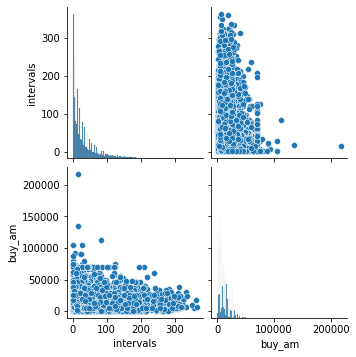

In [12]:
sns.pairplot(c1[['intervals','buy_am']])
plt.show()

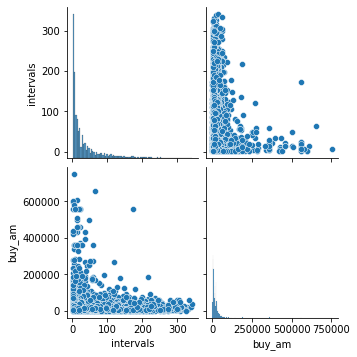

In [13]:
sns.pairplot(c2[['intervals','buy_am']])
plt.show()

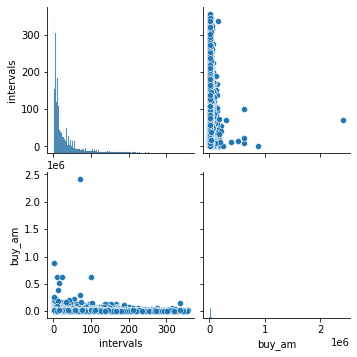

In [14]:
sns.pairplot(d1[['intervals','buy_am']])
plt.show()

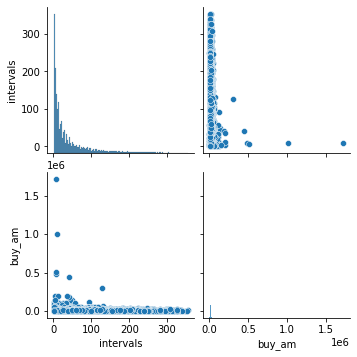

In [15]:
sns.pairplot(d2[['intervals','buy_am']])
plt.show()

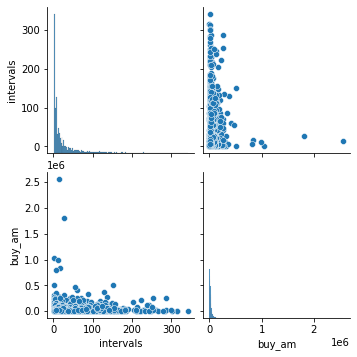

In [16]:
sns.pairplot(e[['intervals','buy_am']])
plt.show()

### ==> 제휴사 C01, C02에서는 두 column 간 연관성이 있는 것으로 판단
### 

# 고객마다 제휴사의 평균 이용 주기 계산

In [17]:
b_person = pd.DataFrame(b.groupby('cust')['intervals'].mean().astype(int))
b_person.columns = ['B01']
b_person_grade = pd.merge(b_person, p1grade, left_on='cust', right_on='cust')
p1grade_interval = pd.merge(p1grade, b_person_grade[['cust','B01']], left_on='cust', right_on='cust', how='outer')

c1_person = pd.DataFrame(c1.groupby('cust')['intervals'].mean().astype(int))
c1_person.columns = ['C01']
c1_person_grade = pd.merge(c1_person, p1grade, left_on='cust', right_on='cust')
p1grade_interval = pd.merge(p1grade_interval, c1_person_grade[['cust','C01']], left_on='cust', right_on='cust', how='outer')

c2_person = pd.DataFrame(c2.groupby('cust')['intervals'].mean().astype(int))
c2_person.columns = ['C02']
c2_person_grade = pd.merge(c2_person, p1grade, left_on='cust', right_on='cust')
p1grade_interval = pd.merge(p1grade_interval, c2_person_grade[['cust','C02']], left_on='cust', right_on='cust', how='outer')

d1_person = pd.DataFrame(d1.groupby('cust')['intervals'].mean().astype(int))
d1_person.columns = ['D01']
d1_person_grade = pd.merge(d1_person, p1grade, left_on='cust', right_on='cust')
p1grade_interval = pd.merge(p1grade_interval, d1_person_grade[['cust','D01']], left_on='cust', right_on='cust', how='outer')

d2_person = pd.DataFrame(d2.groupby('cust')['intervals'].mean().astype(int))
d2_person.columns = ['D02']
d2_person_grade = pd.merge(d2_person, p1grade, left_on='cust', right_on='cust')
p1grade_interval = pd.merge(p1grade_interval, d2_person_grade[['cust','D02']], left_on='cust', right_on='cust', how='outer')

e_person = pd.DataFrame(e.groupby('cust')['intervals'].mean().astype(int))
e_person.columns = ['E01']
e_person_grade = pd.merge(e_person, p1grade, left_on='cust', right_on='cust')
p1grade_interval = pd.merge(p1grade_interval, e_person_grade[['cust','E01']], left_on='cust', right_on='cust', how='outer')

In [18]:
p1grade_interval.tail(5)

,cust,grade,B01,C01,C02,D01,D02,E01
29751,M999708287,General,NaN,58.0,NaN,NaN,NaN,NaN
29752,M999770689,General,22.0,NaN,NaN,157.0,114.0,NaN
29753,M999849895,General,NaN,NaN,NaN,NaN,NaN,NaN
29754,M999926092,General,NaN,NaN,NaN,191.0,83.0,NaN
29755,M999962961,VIP,NaN,26.0,55.0,62.0,NaN,NaN


In [19]:
p1grade_interval.isnull().sum()

cust         0
grade        0
B01      28756
C01      23321
C02      27450
D01      18339
D02      23653
E01      29169
dtype: int64

# 이용 이력이 없는 고객에게는 나이,성별,등급에 따른 평균 이용 주기마다 문자 발송

In [20]:
p1 = pd.read_csv("LPOINT_BIG_COMP_01_DEMO.csv",index_col=0)
p1 = p1.drop('zon_hlv',axis=1)

cust_info = pd.merge(p1,p1grade_interval,left_on='cust',right_on='cust',how='outer')
cust_info

,cust,ma_fem_dv,ages,grade,B01,C01,C02,D01,D02,E01
0,M000034966,여성,40대,General,NaN,NaN,NaN,NaN,NaN,NaN
1,M000059535,여성,30대,General,NaN,NaN,NaN,NaN,NaN,NaN
2,M000136117,여성,30대,MVG,NaN,NaN,NaN,21.0,NaN,NaN
3,M000201112,여성,50대,General,NaN,NaN,NaN,NaN,NaN,NaN
4,M000225114,여성,40대,General,NaN,NaN,106.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,General,NaN,58.0,NaN,NaN,NaN,NaN
29909,M999770689,여성,30대,General,22.0,NaN,NaN,157.0,114.0,NaN
29910,M999849895,여성,20대,General,NaN,NaN,NaN,NaN,NaN,NaN
29911,M999926092,남성,30대,General,NaN,NaN,NaN,191.0,83.0,NaN


In [21]:
cust_info_b = cust_info.loc[:,['ma_fem_dv','ages','grade','B01']]
cust_info_b = cust_info_b.loc[cust_info_b['B01'].isnull() == False]
b_group = pd.DataFrame(cust_info_b.groupby(['ma_fem_dv','ages','grade']).mean())

cust_info_c1 = cust_info.loc[:,['ma_fem_dv','ages','grade','C01']]
cust_info_c1 = cust_info_c1.loc[cust_info_c1['C01'].isnull() == False]
c1_group = pd.DataFrame(cust_info_c1.groupby(['ma_fem_dv','ages','grade']).mean())

cust_info_c2 = cust_info.loc[:,['ma_fem_dv','ages','grade','C02']]
cust_info_c2 = cust_info_c2.loc[cust_info_c2['C02'].isnull() == False]
c2_group = pd.DataFrame(cust_info_c2.groupby(['ma_fem_dv','ages','grade']).mean())

cust_info_d1 = cust_info.loc[:,['ma_fem_dv','ages','grade','D01']]
cust_info_d1 = cust_info_d1.loc[cust_info_d1['D01'].isnull() == False]
d1_group = pd.DataFrame(cust_info_d1.groupby(['ma_fem_dv','ages','grade']).mean())

cust_info_d2 = cust_info.loc[:,['ma_fem_dv','ages','grade','D02']]
cust_info_d2 = cust_info_d2.loc[cust_info_d2['D02'].isnull() == False]
d2_group = pd.DataFrame(cust_info_d2.groupby(['ma_fem_dv','ages','grade']).mean())

cust_info_e = cust_info.loc[:,['ma_fem_dv','ages','grade','E01']]
cust_info_e = cust_info_e.loc[cust_info_e['E01'].isnull() == False]
e_group = pd.DataFrame(cust_info_e.groupby(['ma_fem_dv','ages','grade']).mean())

In [22]:
b_group

B01
ma_fem_dv ages grade              
남성        20대  General   55.388889
               VIP       75.888889
          30대  General   51.476190
               LENITH    27.250000
               MVG       35.266667
               VIP       66.347826
          40대  General   60.425532
               LENITH    42.300000
               MVG       51.625000
               VIP       54.467532
          50대  General   53.294118
               LENITH    48.500000
               MVG       51.909091
               VIP       46.607143
          60대  General   40.600000
               LENITH    31.000000
               MVG       16.000000
               VIP       55.111111
          70대  General   37.000000
               MVG       16.500000
               VIP       34.571429
여성        20대  General   69.318182
               MVG       38.400000
               VIP       72.500000
          30대  General   64.096386
               LENITH    38.666667
               MVG       72.451613
               VIP       71.396396
          40대  General   64.163636
               LENITH    39.916667
               MVG       58.757576
               VIP       41.903226
          50대  General   38.260870
               LENITH    62.000000
               MVG       56.607143
               VIP       36.058824
          60대  General  118.000000
               MVG       59.333333
               VIP       30.000000
          70대  General  109.000000
               MVG       19.000000
               VIP       19.750000